In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Color class for prettier formatting
class Color:
   GREEN = '\033[92m'
   RED = '\033[91m'

# Loading dataset

In [2]:
file_with_clusters = 'data/bank-additional-with-clusters.csv'

dataset = pd.read_csv(file_with_clusters, sep=";")

In [3]:
dataset

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487.0,...,NotContacted,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346.0,...,NotContacted,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227.0,...,NotContacted,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,no
3,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58.0,...,NotContacted,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,no
4,32,services,single,university.degree,no,no,cellular,sep,thu,128.0,...,NotContacted,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,30,admin.,married,basic.6y,yes,yes,cellular,jul,thu,53.0,...,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,no
3803,39,admin.,married,high.school,yes,no,telephone,jul,fri,219.0,...,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0,no
3804,27,student,single,high.school,no,no,cellular,may,mon,64.0,...,NotContacted,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,1,no
3805,58,admin.,married,high.school,no,no,cellular,aug,fri,528.0,...,NotContacted,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,no


In [4]:
rows, cols = dataset.shape

print("Shape of dataset")
print(20*'-')
print(f"No of rows: {rows}\nNo of cols: {cols}")
print(20*'-')

Shape of dataset
--------------------
No of rows: 3807
No of cols: 21
--------------------


# Preparing columns for clustering and classification

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # for selecting optimal hyperparameters
import joblib #for saving and loading a model

#SimpleImputer for automatically filling na's with mean, median...

ordinal_features = ['education', 'housing', 'loan', 'pdays']
nominal_features = ["job", "marital", "contact", "month", "day_of_week", 'poutcome']
minmax_scaler_features = ['duration','age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# X = dataset.loc[:, dataset.columns.difference({'y'})]
X = dataset.iloc[:, :-1]
y = pd.DataFrame(LabelEncoder().fit_transform(dataset.iloc[:, -1].values.ravel()), columns=[dataset.iloc[:, -1].name])

# encoding ordinal variables first, because it cannot be done all in one ColumnTransformer;
# keeping OrdinalEncoder in a variable, so the categories can be retreived later
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(dataset[ordinal_features])

X[ordinal_features] = ordinal_encoder.transform(X[ordinal_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

column_trans = ColumnTransformer(
    [("nominal", OneHotEncoder(handle_unknown='ignore'), nominal_features), 
     ("numerical", MinMaxScaler(), minmax_scaler_features),
     ("ordinal", MinMaxScaler(), ordinal_features),
    ], 
    # remaining columns, which won't be transformed using ColumnTransformer will be added;
    # otherwise, they won't be added
    # remainder="passthrough"
)

In [6]:
# see transformed X dataframe
pd.DataFrame(column_trans.fit_transform(X), columns=column_trans.get_feature_names_out())

,nominal__job_admin.,nominal__job_blue-collar,nominal__job_entrepreneur,nominal__job_housemaid,nominal__job_management,nominal__job_retired,nominal__job_self-employed,nominal__job_services,nominal__job_student,nominal__job_technician,...,numerical__previous,numerical__emp.var.rate,numerical__cons.price.idx,numerical__cons.conf.idx,numerical__euribor3m,numerical__nr.employed,ordinal__education,ordinal__housing,ordinal__loan,ordinal__pdays
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.333333,0.269680,0.192469,0.156401,0.512287,0.4,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.937500,0.698753,0.602510,0.973472,0.859735,0.6,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,1.000000,0.882307,0.376569,0.998155,1.000000,0.6,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.687500,0.389322,0.368201,0.820300,0.877883,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.333333,0.479167,0.778644,0.556485,0.057439,0.000000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.669135,0.338912,0.997232,1.000000,0.2,1.0,1.0,0.0
3803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.669135,0.338912,0.997463,1.000000,0.6,1.0,0.0,0.0
3804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.166667,0.333333,0.269680,0.192469,0.165859,0.512287,0.6,0.0,0.0,0.0
3805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.484412,0.615063,0.999077,1.000000,0.6,0.0,0.0,0.0


# Logistic Regression (default parameters)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# for train-test split
def print_performance(y, y_hat):
    print(f'Accuracy: {np.round(accuracy_score(y, y_hat), 3)}')
    print(f'Precision: {np.round(precision_score(y, y_hat), 3)}')
    print(f'Recall: {np.round(recall_score(y, y_hat), 3)}')
    print(f'F1: {np.round(f1_score(y, y_hat), 3)}', end='\n\n')
    
    tn, fp, fn, tp = confusion_matrix(y, y_hat).ravel()

    confusion_matrix_df = pd.DataFrame({"Model 'Yes'": [f"{tp} (TP)", f"{fp} (FP)"],
             "Model 'No'": [f"{fn} (FN)", f"{tn} (TN)"]}, index=["Actual 'Yes'", "Actual 'No'"])
    
    print(20*'-' + "Confusion matrix" + 20*'-')
    print()
    print(confusion_matrix_df, end='\n\n')
    print(56*'-', end='\n\n')
    
    print(classification_report(y, y_hat))

### Train-test split

In [8]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(solver='liblinear', max_iter=200)

pipe_logreg = Pipeline([("col_trans", column_trans), ("logreg", model_logreg)])

pipe_logreg.fit(X_train, y_train.values.ravel())

y_hat = pipe_logreg.predict(X_test)

print_performance(y_test, y_hat)

Accuracy: 0.927
Precision: 0.745
Recall: 0.373
F1: 0.497

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'     41 (TP)    69 (FN)
Actual 'No'      14 (FP)  1019 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1033
           1       0.75      0.37      0.50       110

    accuracy                           0.93      1143
   macro avg       0.84      0.68      0.73      1143
weighted avg       0.92      0.93      0.92      1143



In [9]:
model_logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Cross-validation

In [10]:
y_hat = cross_val_predict(pipe_logreg, X, y.values.ravel())

print_performance(y, y_hat)

Accuracy: 0.913
Precision: 0.682
Recall: 0.364
F1: 0.475

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    150 (TP)   262 (FN)
Actual 'No'      70 (FP)  3325 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3395
           1       0.68      0.36      0.47       412

    accuracy                           0.91      3807
   macro avg       0.80      0.67      0.71      3807
weighted avg       0.90      0.91      0.90      3807



# Logistic Regression (with hyperparams tunning)

In [11]:
model_logreg_tunned = LogisticRegression(solver='liblinear', max_iter=200)

pipe_logreg_tunned = Pipeline([("col_trans", column_trans), ("logreg", model_logreg_tunned)])

param_grid = [
    {"logreg__penalty": ['l1', 'l2'],
     "logreg__C":  [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500]
    }
]

# n_jobs=-1 => use all CPU cores
grid_search_logreg = GridSearchCV(pipe_logreg_tunned, param_grid, scoring="f1", n_jobs=-1)
grid_search_logreg.fit(X, y.values.ravel())

GridSearchCV(estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('nominal',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome']),
                                                                        ('numerical',
                                                                         MinMaxScaler(),
                                                                         ['duration',
                                                                          'age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed']),
                                                                        ('ordinal',
                                                                         MinMaxScaler(),
                                                                         ['education',
                                                                          'housing',
                                                                          'loan',
                                                                          'pdays'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=200,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'logreg__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                        5, 10, 50, 100, 500],
                          'logreg__penalty': ['l1', 'l2']}],
             scoring='f1')

In [12]:
grid_search_logreg.best_params_

{'logreg__C': 50, 'logreg__penalty': 'l1'}

In [13]:
grid_search_logreg.best_score_

0.535612089315735

In [14]:
pipe_logreg_tunned = grid_search_logreg.best_estimator_

joblib.dump(pipe_logreg_tunned, 'models/logreg_best_m.joblib')

pipe_logreg_tunned

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('ordinal', MinMaxScaler(),
                                                  ['education', 'housing',
                                                   'loan', 'pdays'])])),
                ('logreg',
                 LogisticRegression(C=50, max_iter=200, penalty='l1',
                                    solver='liblinear'))])

In [15]:
pipe_logreg_tunned = joblib.load('models/logreg_best_m.joblib')
pipe_logreg_tunned

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('ordinal', MinMaxScaler(),
                                                  ['education', 'housing',
                                                   'loan', 'pdays'])])),
                ('logreg',
                 LogisticRegression(C=50, max_iter=200, penalty='l1',
                                    solver='liblinear'))])

### Train-test split

In [16]:
pipe_logreg_tunned.fit(X_train, y_train.values.ravel())
y_hat = pipe_logreg_tunned.predict(X_test)

print_performance(y_test, y_hat)

Accuracy: 0.934
Precision: 0.712
Recall: 0.518
F1: 0.6

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'     57 (TP)    53 (FN)
Actual 'No'      23 (FP)  1010 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1033
           1       0.71      0.52      0.60       110

    accuracy                           0.93      1143
   macro avg       0.83      0.75      0.78      1143
weighted avg       0.93      0.93      0.93      1143



In [17]:
pipe_logreg_tunned.predict_proba(X_test)

array([[0.99379493, 0.00620507],
       [0.98579286, 0.01420714],
       [0.99410527, 0.00589473],
       ...,
       [0.92915613, 0.07084387],
       [0.99512204, 0.00487796],
       [0.94597714, 0.05402286]])

### Cross-validation

In [18]:
y_hat = cross_val_predict(pipe_logreg_tunned, X, y.values.ravel())

print_performance(y, y_hat)

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y, y_hat)
auc_logreg = roc_auc_score(y, y_hat)

Accuracy: 0.915
Precision: 0.656
Recall: 0.454
F1: 0.537

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    187 (TP)   225 (FN)
Actual 'No'      98 (FP)  3297 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3395
           1       0.66      0.45      0.54       412

    accuracy                           0.92      3807
   macro avg       0.80      0.71      0.74      3807
weighted avg       0.91      0.92      0.91      3807



### Changing Thresholds

In [19]:
pipe_logreg_tunned.classes_

array([0, 1])

That means we will going to select second index (1) for predict_proba.

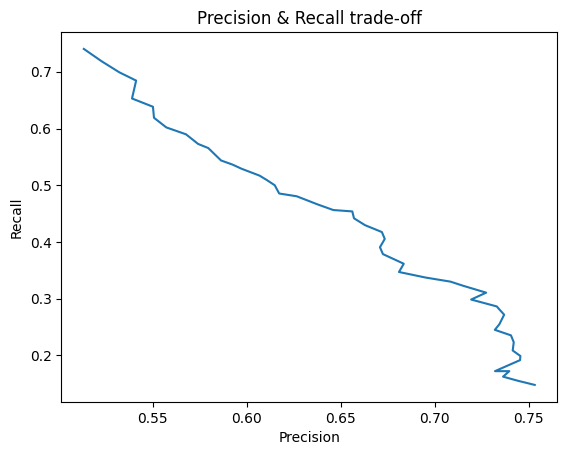

In [20]:
threshold_range = np.linspace(0.2, 0.9, 50)
accuracies = []
precisions = []
recalls = []

cv_probs = cross_val_predict(pipe_logreg_tunned, X, y.values.ravel(), method='predict_proba')[:,1]

for threshold in threshold_range:
    y_hat = cv_probs >= threshold
    accuracies.append(accuracy_score(y, y_hat))
    precisions.append(precision_score(y, y_hat))
    recalls.append(recall_score(y, y_hat))
    
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision & Recall trade-off");

# Decision Tree (default parameters)

### Train-test split

In [21]:
model_tree = DecisionTreeClassifier()

pipe_tree = Pipeline([("col_trans", column_trans), ("tree", model_tree)])

pipe_tree.fit(X_train, y_train.values.ravel())

y_hat = pipe_tree.predict(X_test)

print_performance(y_test, y_hat)

Accuracy: 0.899
Precision: 0.475
Recall: 0.527
F1: 0.5

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'     58 (TP)    52 (FN)
Actual 'No'      64 (FP)   969 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1033
           1       0.48      0.53      0.50       110

    accuracy                           0.90      1143
   macro avg       0.71      0.73      0.72      1143
weighted avg       0.90      0.90      0.90      1143



In [22]:
y.value_counts(normalize=True)

y
0    0.891778
1    0.108222
Name: proportion, dtype: float64

<b>Conclusion:</b> 

There are almost no difference between accuracy of the model and predicting every class as "no" (0). However, using the model we could find roughly 0.48% of people who would deposit (value of recall).

In [23]:
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Cross-validation

In [24]:
y_hat = cross_val_predict(pipe_tree, X, y.values.ravel())

print_performance(y, y_hat)

Accuracy: 0.887
Precision: 0.478
Recall: 0.522
F1: 0.499

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    215 (TP)   197 (FN)
Actual 'No'     235 (FP)  3160 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3395
           1       0.48      0.52      0.50       412

    accuracy                           0.89      3807
   macro avg       0.71      0.73      0.72      3807
weighted avg       0.89      0.89      0.89      3807



<b>Conclusion:</b> 

Recall value from CV is higher and it's more useful.

In [25]:
#pipe_tree['tree'].feature_importances_

# Decision Tree (with hyperparams tunning)

In [26]:
#https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb
model_tree = DecisionTreeClassifier()
pipe_tree_tunned = Pipeline([("col_trans", column_trans), ("tree", model_tree)])

param_grid = [
    {
        "tree__max_depth": [*range(2, 20)],
        # "tree__min_samples_split": [*range(200, 1, -1)]
    }
]

# n_jobs=-1 => use all CPU cores
grid_search_tree = GridSearchCV(pipe_tree_tunned, param_grid, scoring="f1", n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('nominal',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome']),
                                                                        ('numerical',
                                                                         MinMaxScaler(),
                                                                         ['duration',
                                                                          'age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed']),
                                                                        ('ordinal',
                                                                         MinMaxScaler(),
                                                                         ['education',
                                                                          'housing',
                                                                          'loan',
                                                                          'pdays'])])),
                                       ('tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'tree__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18,
                                              19]}],
             return_train_score=True, scoring='f1')

In [27]:
grid_search_tree.best_params_

{'tree__max_depth': 3}

In [28]:
grid_search_tree.best_score_

0.6039547353231564

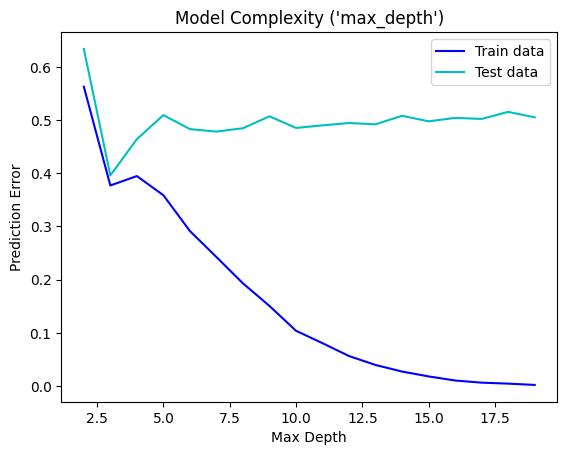

In [29]:
errors_train = 1 - grid_search_tree.cv_results_['mean_train_score']
errors_test = 1 - grid_search_tree.cv_results_['mean_test_score']

plt.plot([*range(2, 20)], errors_train, "b", label="Train data");
plt.plot([*range(2, 20)], errors_test, "c", label="Test data");
plt.xlabel("Max Depth")
plt.ylabel("Prediction Error")
plt.title("Model Complexity ('max_depth')")
plt.legend();

In [30]:
pipe_tree_tunned = grid_search_tree.best_estimator_

joblib.dump(pipe_tree_tunned, 'models/decisiontree_best_m.joblib');

In [31]:
pipe_tree_tunned = joblib.load('models/decisiontree_best_m.joblib')
pipe_tree_tunned

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('ordinal', MinMaxScaler(),
                                                  ['education', 'housing',
                                                   'loan', 'pdays'])])),
                ('tree', DecisionTreeClassifier(max_depth=3))])

### Train-test split

In [32]:
pipe_tree_tunned.fit(X_train, y_train)
y_hat = pipe_tree_tunned.predict(X_test)

print_performance(y_test, y_hat)

Accuracy: 0.925
Precision: 0.591
Recall: 0.709
F1: 0.645

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'     78 (TP)    32 (FN)
Actual 'No'      54 (FP)   979 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1033
           1       0.59      0.71      0.64       110

    accuracy                           0.92      1143
   macro avg       0.78      0.83      0.80      1143
weighted avg       0.93      0.92      0.93      1143



### Cross-validation

In [33]:
y_hat = cross_val_predict(pipe_tree_tunned, X, y.values.ravel())

print_performance(y, y_hat)

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y, y_hat)
auc_tree = roc_auc_score(y, y_hat)

Accuracy: 0.913
Precision: 0.594
Recall: 0.614
F1: 0.604

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    253 (TP)   159 (FN)
Actual 'No'     173 (FP)  3222 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3395
           1       0.59      0.61      0.60       412

    accuracy                           0.91      3807
   macro avg       0.77      0.78      0.78      3807
weighted avg       0.91      0.91      0.91      3807



<b>Conclusion:</b> 

Tunned Decision Tree model works significantly better (compare results manually).

### Changing Thresholds

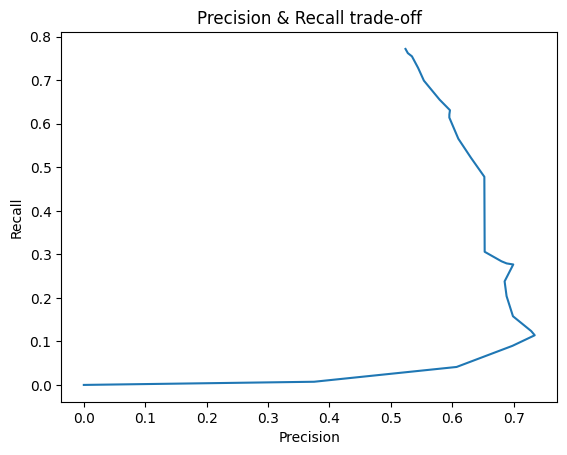

In [34]:
threshold_range = np.linspace(0.2, 0.9, 200)
accuracies = []
precisions = []
recalls = []

cv_probs = cross_val_predict(pipe_tree_tunned, X, y.values.ravel(), method='predict_proba')[:,1]

for threshold in threshold_range:
    y_hat = cv_probs >= threshold
    accuracies.append(accuracy_score(y, y_hat))
    precisions.append(precision_score(y, y_hat, zero_division=0))
    recalls.append(recall_score(y, y_hat, zero_division=0))
    
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision & Recall trade-off");

# Random Forest (default parameters)

### Train-test split

In [35]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()

pipe_forest = Pipeline([("col_trans", column_trans), ("forest", model_forest)])

pipe_forest.fit(X_train, y_train.values.ravel())

y_hat = pipe_forest.predict(X_test)

print_performance(y_test, y_hat)

Accuracy: 0.92
Precision: 0.646
Recall: 0.382
F1: 0.48

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'     42 (TP)    68 (FN)
Actual 'No'      23 (FP)  1010 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1033
           1       0.65      0.38      0.48       110

    accuracy                           0.92      1143
   macro avg       0.79      0.68      0.72      1143
weighted avg       0.91      0.92      0.91      1143



In [36]:
model_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Cross-validation

In [37]:
y_hat = cross_val_predict(pipe_forest, X, y.values.ravel())

print_performance(y, y_hat)

Accuracy: 0.908
Precision: 0.629
Recall: 0.367
F1: 0.463

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    151 (TP)   261 (FN)
Actual 'No'      89 (FP)  3306 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3395
           1       0.63      0.37      0.46       412

    accuracy                           0.91      3807
   macro avg       0.78      0.67      0.71      3807
weighted avg       0.89      0.91      0.90      3807



# Random Forest (with hyperparams tunning)

In [38]:
model_forest_tunned = RandomForestClassifier()

pipe_forest_tunned = Pipeline([("col_trans", column_trans), ("forest", model_forest_tunned)])

param_grid = [
    {"forest__n_estimators": [10, 20, 50, 100, 200, 300],
     "forest__max_depth": [*range(1, 10, 2)],
     # "forest__min_samples_split": [*range(2, 15)]
    }
]

# n_jobs=-1 => use all CPU cores
grid_search_forest = GridSearchCV(pipe_forest_tunned, param_grid, scoring="f1", n_jobs=-1)
grid_search_forest.fit(X, y.values.ravel())

GridSearchCV(estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('nominal',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome']),
                                                                        ('numerical',
                                                                         MinMaxScaler(),
                                                                         ['duration',
                                                                          'age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed']),
                                                                        ('ordinal',
                                                                         MinMaxScaler(),
                                                                         ['education',
                                                                          'housing',
                                                                          'loan',
                                                                          'pdays'])])),
                                       ('forest', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'forest__max_depth': [1, 3, 5, 7, 9],
                          'forest__n_estimators': [10, 20, 50, 100, 200, 300]}],
             scoring='f1')

In [39]:
grid_search_forest.best_params_

{'forest__max_depth': 9, 'forest__n_estimators': 10}

In [40]:
grid_search_forest.best_score_

0.42872840494908715

In [41]:
pipe_forest_tunned = grid_search_forest.best_estimator_

joblib.dump(pipe_forest_tunned, 'models/randomforest_best_m.joblib')

pipe_forest_tunned

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('ordinal', MinMaxScaler(),
                                                  ['education', 'housing',
                                                   'loan', 'pdays'])])),
                ('forest',
                 RandomForestClassifier(max_depth=9, n_estimators=10))])

In [42]:
pipe_forest_tunned = joblib.load('models/randomforest_best_m.joblib')
pipe_forest_tunned

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('ordinal', MinMaxScaler(),
                                                  ['education', 'housing',
                                                   'loan', 'pdays'])])),
                ('forest',
                 RandomForestClassifier(max_depth=9, n_estimators=10))])

### Train-test split

In [43]:
pipe_forest_tunned.fit(X_train, y_train.values.ravel())
y_hat = pipe_forest_tunned.predict(X_test)

print_performance(y_test, y_hat)

Accuracy: 0.927
Precision: 0.75
Recall: 0.355
F1: 0.481

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'     39 (TP)    71 (FN)
Actual 'No'      13 (FP)  1020 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1033
           1       0.75      0.35      0.48       110

    accuracy                           0.93      1143
   macro avg       0.84      0.67      0.72      1143
weighted avg       0.92      0.93      0.91      1143



### Cross-validation

In [44]:
y_hat = cross_val_predict(pipe_forest_tunned, X, y.values.ravel())

print_performance(y, y_hat)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y, y_hat)
auc_forest = roc_auc_score(y, y_hat)

Accuracy: 0.901
Precision: 0.586
Recall: 0.306
F1: 0.402

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    126 (TP)   286 (FN)
Actual 'No'      89 (FP)  3306 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3395
           1       0.59      0.31      0.40       412

    accuracy                           0.90      3807
   macro avg       0.75      0.64      0.67      3807
weighted avg       0.88      0.90      0.89      3807



### Changing Thresholds

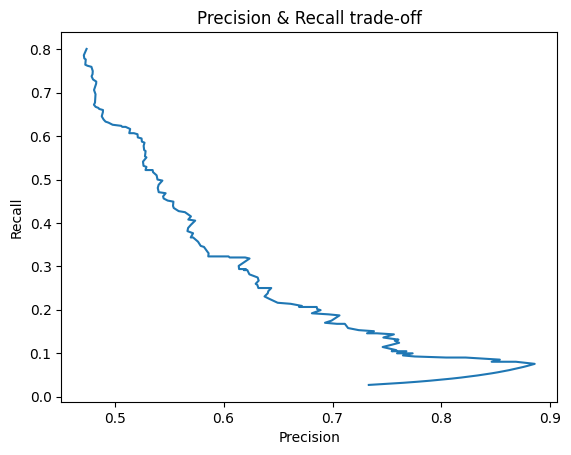

In [45]:
threshold_range = np.linspace(0.2, 0.9, 200)
accuracies = []
precisions = []
recalls = []

cv_probs = cross_val_predict(pipe_forest_tunned, X, y.values.ravel(), method='predict_proba')[:,1]

for threshold in threshold_range:
    y_hat = cv_probs >= threshold
    accuracies.append(accuracy_score(y, y_hat))
    precisions.append(precision_score(y, y_hat))
    recalls.append(recall_score(y, y_hat))    
    
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision & Recall trade-off");

# AUC for all models

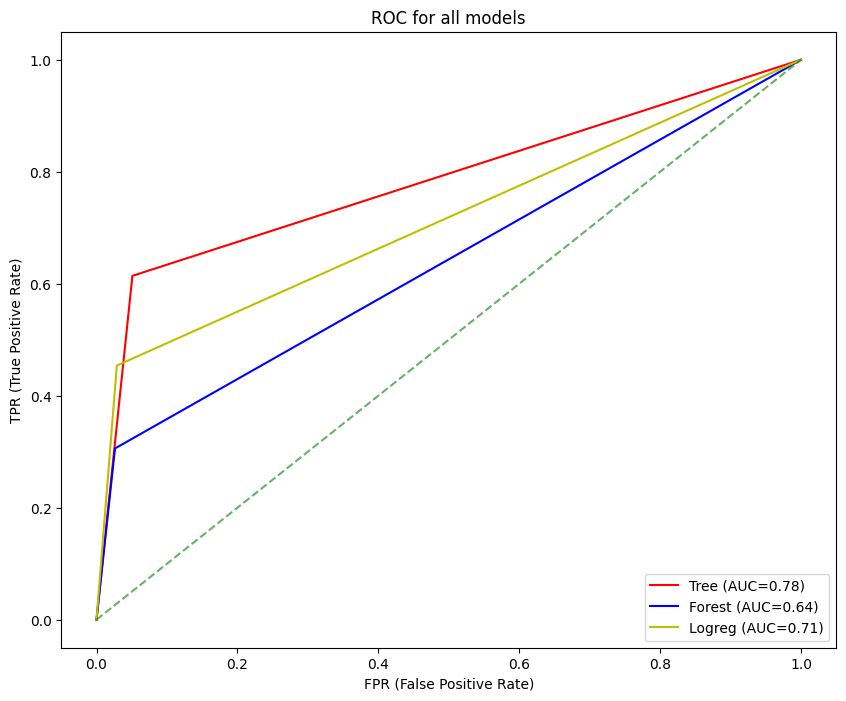

In [46]:
plt.figure(figsize=(10,8))

# plot tunned decision tree
plt.plot(fpr_tree, tpr_tree, c="r", label=f"Tree (AUC={np.round(auc_tree, 2)})")

# plot tunned random forest
plt.plot(fpr_forest, tpr_forest, c="b", label=f"Forest (AUC={np.round(auc_forest, 2)})")

# plot tunned logistic regression
plt.plot(fpr_logreg, tpr_logreg, c="y", label=f"Logreg (AUC={np.round(auc_logreg, 2)})")

# plot diagonal 45 degrees line
plt.plot([0, 1], [0, 1], c="g", linestyle='--', alpha=.6)

plt.ylabel('TPR (True Positive Rate)')
plt.xlabel('FPR (False Positive Rate)')
plt.legend(loc="lower right")
plt.title("ROC for all models");


### Bonus


In [47]:
file_with_clusters = 'data/bank-additional-with-clusters.csv'

dataset = pd.read_csv(file_with_clusters, sep=";")

In [48]:
dataset

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487.0,...,NotContacted,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346.0,...,NotContacted,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227.0,...,NotContacted,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,no
3,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58.0,...,NotContacted,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,no
4,32,services,single,university.degree,no,no,cellular,sep,thu,128.0,...,NotContacted,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,30,admin.,married,basic.6y,yes,yes,cellular,jul,thu,53.0,...,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,no
3803,39,admin.,married,high.school,yes,no,telephone,jul,fri,219.0,...,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0,no
3804,27,student,single,high.school,no,no,cellular,may,mon,64.0,...,NotContacted,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,1,no
3805,58,admin.,married,high.school,no,no,cellular,aug,fri,528.0,...,NotContacted,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,no


In [49]:
# parting dataset using different clusters
X_cluster_0 = X[X['cluster'] == 0].iloc[:, :-1] # column "cluster" is no longer needed
X_cluster_1 = X[X['cluster'] == 1].iloc[:, :-1]

y_cluster_0 = y.iloc[X[X['cluster']== 0].index]
y_cluster_1 = y.iloc[X[X['cluster']== 1].index]

In [50]:
# perform classification model on dataset subset that represent certain cluster
def cluster_decision_tree(X_cluster, y_cluster):
    
    model = DecisionTreeClassifier()
    pipe = Pipeline([("col_trans", column_trans), ("tree", model)])

    param_grid = [
    {
        "tree__max_depth": [*range(2, 20)],
        # "tree__min_samples_split": [*range(200, 1, -1)]
        }
    ]

    # n_jobs=-1 => use all CPU cores
    grid_search = GridSearchCV(pipe, param_grid, scoring="f1", n_jobs=-1, return_train_score=True)
    grid_search.fit(X_cluster, y_cluster)
    
    model = grid_search.best_estimator_
    
    y_hat = cross_val_predict(model, X_cluster, y_cluster.values.ravel())

    # prints Accuracy, Precision and other necessary metrics
    print_performance(y_cluster, y_hat)
    
    # returns ys so they can be merged in one dataframe
    return y_cluster, y_hat

In [51]:
print(20*'=' +"Cluster 0" + 20*'=')
y_test_0, y_hat_0 = cluster_decision_tree(X_cluster_0, y_cluster_0)

print(20*'=' +"Cluster 1" + 20*'=')
y_test_1, y_hat_1 = cluster_decision_tree(X_cluster_1, y_cluster_1)

====================Cluster 0====================
Accuracy: 0.952
Precision: 0.51
Recall: 0.408
F1: 0.453

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'     51 (TP)    74 (FN)
Actual 'No'      49 (FP)  2398 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2447
           1       0.51      0.41      0.45       125

    accuracy                           0.95      2572
   macro avg       0.74      0.69      0.71      2572
weighted avg       0.95      0.95      0.95      2572

====================Cluster 1====================
Accuracy: 0.819
Precision: 0.608
Recall: 0.62
F1: 0.614

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    178 (TP)   109 (FN)
Actual 'No'     115 (FP)   833 (TN)

--------------------------------------------------------

         

In [52]:
# creating dataframe with both y_test and y_hat for every cluster
y_both_cluster_0 = pd.DataFrame({'y_test': np.ravel(y_test_0),'y_hat': np.ravel(y_hat_0)})
y_both_cluster_1 = pd.DataFrame({'y_test': np.ravel(y_test_1),'y_hat': np.ravel(y_hat_1)})

# creating dataframe with both clusters (the whole test set)
y_both = pd.concat([y_both_cluster_0, y_both_cluster_1])

# checking the total performance of classification by clusters

print(20*'=' +"Whole Test Set" + 20*'=')
print_performance(y_both['y_test'], y_both['y_hat'])

====================Whole Test Set====================
Accuracy: 0.909
Precision: 0.583
Recall: 0.556
F1: 0.569

--------------------Confusion matrix--------------------

             Model 'Yes' Model 'No'
Actual 'Yes'    229 (TP)   183 (FN)
Actual 'No'     164 (FP)  3231 (TN)

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3395
           1       0.58      0.56      0.57       412

    accuracy                           0.91      3807
   macro avg       0.76      0.75      0.76      3807
weighted avg       0.91      0.91      0.91      3807



In [53]:
# costs = np.array([[0, 50], [10, 0]])

# confusion_matrix(y, y_hat) * costs
# (confusion_matrix(y_test, y_hat) * costs).sum().sum()

# def cost_matrix(y_true, y_pred, costs):
#     conf_mat = confusion_matrix(y_true, y_pred)
#     return (conf_mat * costs).sum()

# cost_matrix(y_test, y_hat, costs)
# from sklearn.metrics import make_scorer

# costs_scorer = make_scorer(cost_matrix, costs=costs, greater_is_better=False)
# cross_val_score(pipe, X, y, scoring=costs_scorer)